In [1]:
from WenXuan import WenXuan
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Organize WenXuan into Text and Comment Tuples

In this notebook, we would try to split texts and commentaries in WenXuan into a list of tuples. The final goal is to analyze the 李善 commentaries in WenXuan. Because Han-Ji used smaller fontsize for both commentaries and sound glosses, we have to get rid of the sound glosses first.

## Loading Data for WenXuan

At first, we can load the raw html pages from the `data/` folder. 

In [2]:
wenxuan = WenXuan("2018-06-02", "MF" )
wenxuan.bookname = "wenshuan_rare_sinica_char"
wenxuan.load_htmls()

[Info] Stop at loading data/wenshuan_rare_sinica_char_0582.html.
[Info] Total length of the data is 582.


In [3]:
len(wenxuan.flat_bodies)

582

In the `wenxuan.flat_bodies` attribute, we have a list of `bs4` object stands for the raw page from WenXuan. Because we want to design further methods to organize the information in WenXuan, saving a list of `bs4` objects could help us to save our time to looping over the HanJi web page repeatedly. 

## Get the List of Bookmark

Since we have a list of `bs4` soup, we can loop over it and get the bookmark on every pages via, 

```python
    for soup in self.flat_bodies:
        # extract gobookmark
        path  = soup.find('a', attrs={'class', 'gobookmark'}).text
        self.paths.append(path)
```
and save in the `wenxuan.paths`.


In [4]:
wenxuan.extract_paths()

In [ ]:
# preview some bookmarks
wenxuan.paths[:5]

## Extract MetaData 

The extraction of metadata is done by the organizing the bookmark. However, for the author names, we first extract the author names on every pages using `indent` & `padding` via `wenxuan.get_author_bag`, and `wenxuan.get_author_bag` will save author names and the comments attached on it to a `defaultdict(list)` in `wenxuan.author_bag`. And we will use the `author_bag` to cross-check the author names in the bookmarks.

In [7]:
wenxuan.get_author_bag()

[Warning] No author name in 47 item, but got a tag. Attach this tag to previous author name 陸士衡.
[Warning] No author name in 53 item, but got a tag. Attach this tag to previous author name 王子淵.
[Warning] No author name in 62 item, but got a tag. Attach this tag to previous author name 曹子建.
[Warning] No author name in 88 item, but got a tag. Attach this tag to previous author name 丘希範.
[Warning] No author name in 95 item, but got a tag. Attach this tag to previous author name 謝玄暉.
[Warning] No author name in 111 item, but got a tag. Attach this tag to previous author name 應璩.
[Warning] No author name in 117 item, but got a tag. Attach this tag to previous author name 魏文帝.
[Warning] No author name in 187 item, but got a tag. Attach this tag to previous author name 劉越石.
[Warning] Author name, 飲馬長城窟行 in 244, is too long. Discard this one.
[Warning] No author name in 244 item, but got a tag. Attach this tag to previous author name 顏延年.
[Warning] No author name in 256 item, but got a tag. At

The warning information shows that, for some comments of the author, the comments would possibly be cut off by the page divider. In that case, we would attach the comments to the previous author name in the same page.

In [8]:
# here are all the author names got from every pages
wenxuan.author_bag.keys()

dict_keys(['班孟堅', '張平子', '薛綜注', '左太沖', '劉淵林注', '楊子雲', '潘安仁', '司馬長卿', '郭璞注', '徐爰注', '班叔皮', '曹大家', '王仲宣', '孫興公', '鮑明遠', '王文考', '張載注', '何平叔', '木玄虛', '郭景純', '宋玉', '謝惠連', '謝希逸', '賈誼', '禰正平', '張茂先', '顏延年', '舊注', '向子期', '陸士衡', '江文通', '王子淵', '傅武仲', '馬季長', '嵇叔夜', '成公子安', '曹子建', '束廣微', '謝靈運', '韋孟', '劉公幹', '應德璉', '陸士龍', '應吉甫', '謝宣遠', '范蔚宗', '丘希範', '沈休文', '孫子荊', '謝玄暉', '張景陽', '盧子諒', '虞子陽', '應璩', '何敬宗', '王康琚', '魏文帝', '殷仲文', '謝叔源', '徐敬業', '阮嗣宗', '顏延年\u3000沈約等注', '歐陽堅石', '張孟陽', '任彥昇', '司馬紹統', '何敬祖', '潘正叔', '傅長虞', '郭泰機', '劉越石', '王僧達', '陸韓卿', '范彥龍', '陶淵明', '長歌行', '班婕妤', '魏武帝', '石季倫', '繆熙伯', '荊軻', '漢高祖', '李少卿', '蘇子卿', '傅休奕', '曹顏遠', '王正長', '棗道彥', '張季鷹', '王景玄', '袁陽源', '劉休玄', '屈平', '王逸注', '劉安', '枚叔', '漢武帝', '潘元茂', '傅季友', '王元長', '孔文舉', '諸葛孔明', '羊叔子', '李令伯', '張士然', '庾元規', '桓元子', '李斯', '鄒陽', '楊德祖', '繁休伯', '陳孔璋', '吳季重', '司馬子長', '楊子幼', '朱叔元', '阮元瑜', '應休璉', '趙景真', '劉孝標', '劉子駿', '孔德璋', '鍾士季', '宋\u3000玉', '東方曼倩', '卜子夏', '鄭氏箋', '孔安國', '杜預', '皇甫士安', '史孝山', '劉伯倫', '夏侯孝若', '袁彥伯', '蔡邕注', '干令升', '賈\u3000誼', '曹元首', '韋弘嗣'

In [9]:
wenxuan.extract_meta() # Warning will print all the pages without an author name in bookmark

[Warning] No author name in the path, 集／總集／文選／卷第二十七　詩戊之一／樂府上／古樂府三首／飲馬長城窟行(P.1277).
[Warning] No author name in the path, 集／總集／文選／卷第二十七　詩戊之一／樂府上／古樂府三首／傷歌行(P.1278).
[Warning] No author name in the path, 集／總集／文選／卷第二十七　詩戊之一／樂府上／古樂府三首／長歌行(P.1279).
[Warning] No author name in the path, 集／總集／文選／卷第二十九　詩己之一／雜詩上／古詩一十九首(P.1343).
[Warning] No author name in the path, 集／總集／文選／卷第五十九　碑文下　墓誌／碑文下／王簡棲頭陁寺碑文(P.2527).
[Warning] Path is too short, 集／總集／文選／附(P.2610). Only use title for metadata.


Here we found an error in 集／總集／文選／卷第五十九　碑文下　墓誌／碑文下／王簡棲頭陁寺碑文. The author name we got in the raw page is 主簡棲, but we only have 王簡棲 in the bookmark.

In [10]:
# here are the metadata dicts
wenxuan.flat_meta[:5]

[defaultdict(str,
             {'author': '班孟堅',
              'category': '賦甲之一',
              'genre': '京都上之一',
              'scroll': '卷第一',
              'title': '兩都賦二首/兩都賦序(P.1)'}),
 defaultdict(str,
             {'author': '班孟堅',
              'category': '賦甲之一',
              'genre': '京都上之一',
              'scroll': '卷第一',
              'title': '兩都賦二首/西都賦(P.5)'}),
 defaultdict(str,
             {'author': '班孟堅',
              'category': '賦甲之一',
              'genre': '京都上之一',
              'scroll': '卷第一',
              'title': '兩都賦二首/東都賦(P.23)'}),
 defaultdict(str,
             {'author': '班孟堅',
              'category': '賦甲之一',
              'genre': '京都上之一',
              'scroll': '卷第一',
              'title': '兩都賦二首/東都賦/明堂詩(P.40)'}),
 defaultdict(str,
             {'author': '班孟堅',
              'category': '賦甲之一',
              'genre': '京都上之一',
              'scroll': '卷第一',
              'title': '兩都賦二首/東都賦/辟雍詩(P.40)'})]

# Organize the Text and Commentary Tuples

In this step, we just put the nearby text and smaller fontsize together.

In [11]:
wenxuan.heads2tuples()    # put head and all other thing behind a head to a tuple
wenxuan.passages2tuples() # put text and the smaller fontsize behind it to a tuple

In [12]:
wenxuan.flat_passages[5]

[('乃經靈臺，靈臺既崇。', '毛詩曰：經始靈臺，經之營之。'),
 ('帝勤時登，爰考休徵。', '東觀漢記曰：永平二年，詔曰：登靈臺，正儀度。休徵，已見上文。'),
 ('三光宣精，五行布序。', '淮南子曰：夫道，紘宇宙而章三光。高誘曰：三光，日、月、星也。尚書曰：五行：一曰水，二曰火，三曰木，四曰金，五曰土也。'),
 ('習習祥風，祁祁甘雨。',
  '毛詩曰：習習谷風。禮斗威儀曰：君乘火而王，其政頌平，則祥風至。宋均曰：即景風也，其來長養萬物。毛詩曰：興雨祁祁。尚書考靈燿曰：熒惑順行，甘雨時也。'),
 ('百穀蓁蓁，庶草蕃', '音繁'),
 ('廡', '音武。韓詩曰：帥時農夫，播厥百穀。薛君曰：穀類非一，故言百也。又曰：蓁蓁者莪。薛君曰：蓁蓁，盛貌也。尚書曰：庶草蕃廡。'),
 ('屢惟豊年，於皇樂胥。', '毛詩曰：綏萬國，屢豐年。又曰：於皇時周。又曰：君子樂胥。')]

## Possible Methods to Cut Off the Sound Glosses

Usually, the sound glosses are shorter than the true commentary. We could try out this hypothesis.

We could plot the lengths of every comments into a histogram.

(array([1.7998e+04, 1.3620e+03, 2.0900e+02, 5.8000e+01, 1.9000e+01,
        7.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  103.6,  207.2,  310.8,  414.4,  518. ,  621.6,  725.2,
         828.8,  932.4, 1036. ]),
 <a list of 10 Patch objects>)

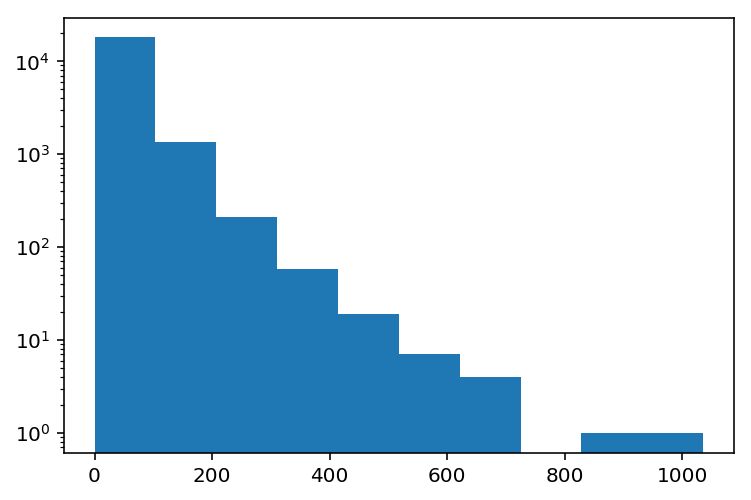

In [12]:
plt.hist(
    [len(c) for passage in wenxuan.flat_passages
        for _,c in passage], log=1
)

The overall distribution range from 0 character to ~1,000 characters, but we only want to focus on shorter range, like 0 ~ 10 characters.

(array([133., 526., 810., 168.,  12., 204., 105.,  86., 144., 325., 334.,
        239., 289., 221., 359., 230., 234., 285., 530.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

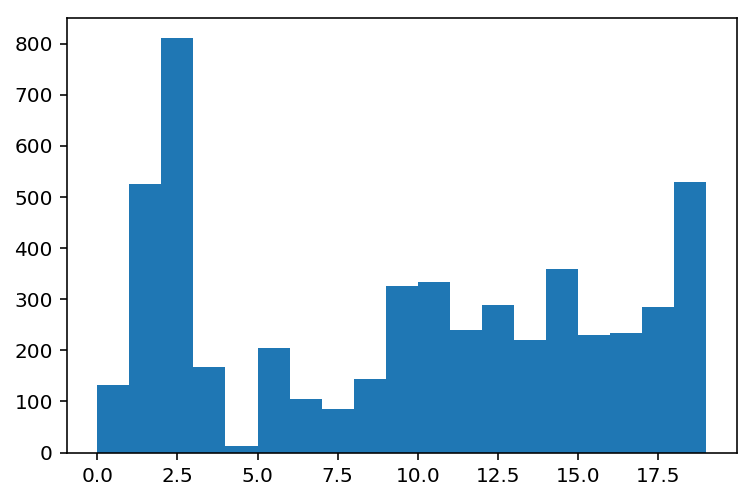

In [13]:
plt.hist(
    [len(c) for passage in wenxuan.flat_passages
        for _,c in passage], 
    bins=range(20)
)

There's a clear gap around 5 characters. Maybe we can try to set the limit to 5 characters.

In [14]:
print([c for passage in wenxuan.flat_passages
    for _,c in passage if len(c) < 5][::5])

['', '', '音渾', '雉', '苦灰 ', '徒頰切', '直用', '徒南', '許覲', '竹交', '語', '紆元', '息亮', '庸 ', '丁敢', '蟻', '蒨', '樣', '以冉 ', '他結', '灌', '一作瑣 ', '亶', '移 ', '子廉', '七刀', '素頰', '赴', '祖管', '烏夭', '計', '烏瓜 ', '育', '口江', '莽', '五迴', '吟', '溪', '謬', '更黠', '并', '在官', '廷', '謹', '遲', '如涌', '骨 ', '呼答', '流', '隅', '汙', '將', '保', '吐雞', '徒濫', '薛', '直旅 ', '之餘', '萍計', '渠舉', '殺', '仕角', '力達', '逵', '去聲', '莫蒲', '烏覽', '於文', '胡內', '生', '傷', '邪', '步交', '資覩 ', '許力', '故蝶', '啼', '聊', '普郎', '心移', '呼亞', '于句', '將', '墳 ', '于鬼', '苦檻', '苦后', '莫構', '句', '公達 ', '盈', '紙', '尉', '於堯', '音蟻 ', '尋', '丙', '俊', '音託', '偉', '素', '居', '許勿', '平', '甲', '烏感', '古火', '蓄', '決', '五蓋', '步對', '呼光', '翊遵', '直氏', '披', '賾', '波', '縶', '去聲', '丁禮', '五賣', '稅', '胡角', '舛', '耽', '父', '魚檢', '音老', '亦', '了', '步交', '以占', '古', '以焦', '會', '惠', '一據', '徒南', '古侯。', '力割', '烏介', '', '以上 ', '丁鄧 ', '公鳥', '衛', '丑六', '丘軌 ', '魚勿', '宏', '亦', '魚桀', '徒感', '休', '胡甲', '以主', '以出', '七咸', '七林 ', '亦', '余兩', '交', '以出', '乙于 ', '匹帛', '苦合', '奴冷 ', '匹宏', '藥', '式染 ', '叔', '楚爽', '藥', '充制', '烏 ', '銀', 

It seems ok, but we noticed 3 character phrases were the phrases contained "切" or "反" or "作" or the decomposition of the rare characters. Also, we have to replace " " with "" and replace all punctuations. The irregularities are '其三。', '其八。', '其八。', '其六。', '其九。', '其七。', '其四。', I do not have a good strategy to strip them in current stage.

In [16]:
print([c for passage in wenxuan.flat_passages
    for _,c in passage if len(c) == 3])

['則工切', '馬黨切', '七亦切', '思衍切', '亡禹 ', '苦灰 ', '徒頰切', '以冉 ', '一作驅', '牛列切', '所交切', '其筆 ', '蒲葛 ', '巨宜 ', '子侯 ', '子小 ', '烏瓜 ', '烏交 ', '九六 ', '奇殞 ', '自吝 ', '知旅 ', '苦札 ', '步覓 ', '所蟹 ', '直旅 ', '陟滑 ', '尸然 ', '於問 ', '求癸 ', '古熒 ', '音旨 ', '扶刎 ', '資覩 ', '昌志 ', '在宗 ', '武蓋 ', '度羅 ', '許于 ', '胡剛 ', '徒蘭 ', '公達 ', '浦覓 ', '匹各 ', '音蟻 ', '在爵 ', '呼恭切', '詞翠切', '以良切', '烏朗切', '古侯。', '一龍反', '古雅 ', '以上 ', '丁達 ', '七感切', '卑遙 ', '丁鄧 ', '力鬼 ', '亡匪 ', '丘軌 ', '七林 ', '乃朗 ', '彼苗 ', '他答，', '乙于 ', '土含 ', '奴冷 ', '式染 ', '莫泠 ', '子工 ', '\uf4d1\uf6a4不', '呼甘 ', '具側 ', '行\uf6a5童', '皮義 ', '市專 ', '古旦 ', '升豉 ', '九永 ', '丘殞 ', '力蹔 ', '其三。', '其八。', '其八。', '其六。', '其九。', '其七。', '其四。', '平聲 ', '巨員反', '女六切', '於宜反', '一作崎', '音呂 ', '音蜀 ', '徒河切', '於元切', '力救切', '土刀切', '女六切', '苦覓切', '奴教切', '胡卦切', '昌占切', '於紀切', '田證切', '之涉切', '苦改切', '苦結切', '古豆切', '川芮切', '七亦切', '亡粉切', '七忽，', '居展切', '初良切', '亡貝切', '子律切', '直追切', '巨依切', '史柱切', '都割切', '蒲沃切', '魚解切', '柴懈切', '七良切', '于偽切', '烏臥切', '力割切', '烏臥切', '胡定切', '居蟹切', '力而切', '勑律切', '息惟切', '七靖切', '他改切', '榮美切', '古臥切', '丁段切

## Punctuations Counting

The followings were the tricky things I have done. The hypothesis here was that sound glosses could be divided into 2 categories:
- **Only sound glosses in the comments**: we would get zero or one punctuation. (mistakes⁇ why putting punctuations in sound glosses 🤷)
- **Sound glosses before 李善 commentary**: we could split `。` and get the sound glosses before first period. We should only the zero punctuation for sound glosses in this case.

So, this function simply count the total number of punctuations in a string based on items in `pun_bag`.

In [17]:
def punctuation_count(phrase, pun_bag = {"、","。", "，", "？", "：", "；", "「", "」"}):
    '''Count num punctuactions in phrase based on a given pun_bag'''
    return sum(phrase.count(p) for p in pun_bag)

punctuation_count('東觀漢記曰：永平二年，詔曰：登靈臺，正儀度。休徵，已見上文。') # Yeh, 7 punctuations

7

So, my suggestion for dividing these two types of commentaries are like this:

In [18]:
def test(text, comment):
    if  (punctuation_count(comment) < 2 and # only count 0 or 1 punctuation
        len(re.sub(r"[、。，？：；「」]", "", comment.replace(" ", ""))) < 5 and  # restrict comment not longer than chars
        comment != ""): # do not count ""
        return (text[-1], comment)

    elif (punctuation_count(comment.split("。")[0]) == 0 and  # if there's no punctuation before period
        0 < len(comment.split("。")[0]) < 5): # if the length of comment before period < 5 and > 0
        return (text[-1], comment.split("。")[0])

    else: return None

# case 1
text, comment = wenxuan.flat_passages[29][45]
print("CASE 1:", text, comment, test(text, comment), "\n")

# case 2
text, comment = wenxuan.flat_passages[29][-12]
print("CASE 2:", text, comment, test(text, comment), "\n")

CASE 1: 䨴 徒會 ('䨴', '徒會') 

CASE 2: 歷列辟而論功，無今日之至治 直之反。封禪書曰：歷選列辟。李尤平樂觀賦曰：披典籍以論功，蓋罔及乎大漢。莊子曰：容成氏、大庭氏，若此時至治也。 ('治', '直之反') 



The hilarious thing is that `text[-1]` may refer to punctuation. 🤦‍

In [19]:
for passage in wenxuan.flat_passages[:5]:
    for text, comment in passage:
        if test(text, comment) != None:
            print(test(text, comment), "What's going on?", text)

('冠', '古亂') What's going on? 其陰則冠
('嵕', '子紅') What's going on? 以九嵕
('觀', '古亂') What's going on? ，陪以甘泉，乃有靈宮起乎其中。秦漢之所極觀
('爓', '音艷') What's going on? 發五色之渥彩，光爓
('。', '謂光武也') What's going on? 於是聖皇乃握乾符，闡坤珍。披皇圖，稽帝文。赫然發憤，應若興雲。霆擊昆陽，憑怒雷震。
('嵕', '則工切') What's going on? 秦嶺九嵕


## Avoid Attaching Sound Glosses to Punctuations 🤦‍

So the idea here is simple, just search backward and find the the character which is not a punctuation.

In [20]:
def _backward_char_search(phrase, exclude = {" ", "、","。", "，", "？", "：", "；", "「", "」"}):
    for char in phrase[::-1]:
        if char not in exclude:
            return char
        else: continue

In [21]:
# Try it!
_backward_char_search("於是聖皇乃握乾符，闡坤珍。披皇圖，稽帝文。赫然發憤，應若興雲。霆擊昆陽，憑怒雷震。")

'震'

Yeah.

## Wrap All Things Up

In [22]:
def _punctuation_count(phrase, pun_bag = {"、","。", "，", "？", "：", "；", "「", "」"}):
    '''Count num punctuactions in phrase based on a given pun_bag'''
    return sum(phrase.count(p) for p in pun_bag)

def _backward_char_search(phrase, exclude = {" ", "、","。", "，", "？", "：", "；", "「", "」"}):
    '''Return the frist char which is not in exclude.'''
    for char in phrase[::-1]:
        if char not in exclude:
            return char
        else: continue            

def _sound_glosses_check(text, comment):
    '''Check the comment is a sound glosses or not.
    If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
    if  (_punctuation_count(comment) < 2 and 
        len(re.sub(r"[、。，？：；「」]", "", comment.replace(" ", ""))) < 5 and 
        comment != ""):
        return _backward_char_search(text), re.sub(r"[、。，？：；「」]", "", comment)
        
    elif (_punctuation_count(comment.split("。")[0]) == 0 and 
        0 < len(comment.split("。")[0]) < 5):
        return _backward_char_search(text), comment.split("。")[0]
    
    else: return None
    
# A place to save sound glosses    
sound_glosses = []

for i,passage in enumerate(wenxuan.flat_passages):
    for p,c in passage:
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)

Apparently, comments with length 4 are not sound glosses. 😑

In [23]:
print([c for i,p,c in sound_glosses if len(c) == 4][::5])

['謂光武也', '小渚曰阯', '侲之言善', '止戈曰武', '大鹿曰麟', '言自恣也', '皆竹名也', '正橫射也', '謂日磾也', '其色狀也', '謂建城也', '言將曉也', '言失度也', '誡群司也', '逝謂死也', '謂惠帝也', '言無常也', '訣與決同', '霞或為華', '在背曰被', '稽神明也', '吐詞情也', '刈蒿菅也', '被刑戮也', '承顏色也', '轉隨俗也', '普愛眾也', '安步徐也', '貨賂行也', '居朝堂也', '所念慮也', '皯黴黑也', '忠絜己也', '隨俗方圜', '從其俗也', '拂土芥也', '身消爛也', '沐浴陞朝', '柴棘為叢', '霧氣昧也', '心剝切也', '交錯扶疎', '走住殊異', '頓猶捨也', '謂大罵也', '血即淚也', '公謂曹操', '謂霍光也', '言難辭也', '禮記文也']


In [24]:
## Just repeat the code above but changing the condition for len of the sound glosses
def _sound_glosses_check(text, comment):
    '''Check the comment is a sound glosses or not.
    If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
    if  (_punctuation_count(comment) < 2 and 
        len(re.sub(r"[、。，？：；「」]", "", comment.replace(" ", ""))) < 4 and 
        comment != ""):
        return _backward_char_search(text), re.sub(r"[、。，？：；「」]", "", comment)
        
    elif (_punctuation_count(comment.split("。")[0]) == 0 and 
        0 < len(comment.split("。")[0]) < 4):
        return _backward_char_search(text), comment.split("。")[0]
    
    else: return None
    
# A place to save sound glosses    
sound_glosses = []

for i,passage in enumerate(wenxuan.flat_passages):
    for p,c in passage:
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)

In [25]:
print(sound_glosses[::15])

[(1, '冠', '古亂'), (8, '轢', '音歷'), (9, '蹐', '籍'), (9, '參', '所今'), (9, '蠯', '蒲佳'), (9, '軯', '普耕'), (9, '鉠', '於良切'), (9, '祧', '吐堯'), (9, '佶', '其栗'), (9, '斮', '側角'), (9, '陬', '子侯 '), (9, '覆', '赴'), (9, '蘖', '魚竭'), (10, '雘', '烏郭'), (10, '巇', '許宜'), (10, '\ue0c0', '五結'), (10, '柍', '於兩'), (10, '籠', '龍'), (10, '濜', '自吝 '), (10, '淚', '力計'), (10, '薠', '煩'), (10, '鵾', '昆'), (10, '廡', '武'), (10, '滍', '秩履'), (10, '醢', '海'), (11, '當', '去聲'), (12, '崛', '魚物'), (12, '湯', '傷'), (12, '蒩', '資覩 '), (12, '荑', '啼'), (12, '楟', '亭 '), (12, '攢', '在官'), (12, '塏', '愷'), (12, '榔', '郎 '), (12, '摫', '規'), (12, '朅', '綺列'), (12, '摛', '勑離'), (13, '鼊', '辟'), (13, '殷', '上聲'), (13, '筑', '竹'), (13, '穗', '詞翠切'), (13, '酋', '自由'), (13, '著', '池著'), (13, '緡', '密巾'), (13, '喑', '廕'), (14, '湫', '子小'), (14, '\uecb7', '楚洽'), (14, '蒻', '弱'), (14, '藏', '去'), (14, '衽', '而審'), (14, '系', '胡計切'), (21, '已', '射應也'), (26, '曒', '公鳥'), (28, '巋', '丘軌 '), (28, '磑', '五哀'), (29, '崖', '宜'), (29, '熠', '以入'), (30, '澹', '徒敢'), (30, '湠', '炭'), (30, '\ue

Yeah, so far seems ok. 

## Put back to WenXuan Class

This is the part of the WenXuan class. This part is the class methods we defined in this notebook:

```python 
class WenXuan(Book):

    ...

    def _punctuation_count(self, phrase, pun_bag = {"、","。", "，", "？", "：", "；", "「", "」"}):
        '''Count num punctuactions in phrase based on a given pun_bag'''
        return sum(phrase.count(p) for p in pun_bag)

    def _backward_char_search(self, phrase, exclude = {" ", "、","。", "，", "？", "：", "；", "「", "」"}):
        '''Return the frist char which is not in exclude.'''
        for char in phrase[::-1]:
            if char not in exclude:
                return char
            else: continue       

    def _sound_glosses_check(self, text, comment):
        '''Check the comment is a sound glosses or not.
        If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
        if  (self._punctuation_count(comment) < 2 and 
            len(re.sub(r"[、。，？：；「」]", "", comment.replace(" ", ""))) < 4 and 
            comment != ""):
            return self._backward_char_search(text), re.sub(r"[、。，？：；「」]", "", comment)

        elif (self._punctuation_count(comment.split("。")[0]) == 0 and 
            0 < len(comment.split("。")[0]) < 4):
            return self._backward_char_search(text), comment.split("。")[0]

        else: return None

    def extract_sound_glosses(self):
        # A place to save sound glosses    
        self.sound_glosses = []

        for i,passage in enumerate(self.flat_passages):
            for p,c in passage:
                # check if c is a single phrase comment
                sound_gloss = self._sound_glosses_check(p, c)
                if sound_gloss != None:
                    self.sound_glosses.append((i,) + sound_gloss)     
```

## (Added) Take Out Sound Glosses

We not only want to get a bag of sound glosses as a dictionary but also want to remove sound gloss sentences in the original texts. To do that, we can use a new list to store the phrases with sound glosses and concatenate them to the next phrase without sound glosses.

In [26]:
passage = wenxuan.flat_passages[5]

In [27]:
# A place to save sound glosses    
new_passage = []

p_preivous_buffer = ''
for j,(p,c) in enumerate(passage):
    # check if c is a single phrase comment
    sound_gloss = _sound_glosses_check(p, c)
    if sound_gloss != None:
        p_preivous_buffer += p
    else:
        new_passage.append((p_preivous_buffer + p, c))
        p_preivous_buffer = ''

In [28]:
passage

[('乃經靈臺，靈臺既崇。', '毛詩曰：經始靈臺，經之營之。'),
 ('帝勤時登，爰考休徵。', '東觀漢記曰：永平二年，詔曰：登靈臺，正儀度。休徵，已見上文。'),
 ('三光宣精，五行布序。', '淮南子曰：夫道，紘宇宙而章三光。高誘曰：三光，日、月、星也。尚書曰：五行：一曰水，二曰火，三曰木，四曰金，五曰土也。'),
 ('習習祥風，祁祁甘雨。',
  '毛詩曰：習習谷風。禮斗威儀曰：君乘火而王，其政頌平，則祥風至。宋均曰：即景風也，其來長養萬物。毛詩曰：興雨祁祁。尚書考靈燿曰：熒惑順行，甘雨時也。'),
 ('百穀蓁蓁，庶草蕃', '音繁'),
 ('廡', '音武。韓詩曰：帥時農夫，播厥百穀。薛君曰：穀類非一，故言百也。又曰：蓁蓁者莪。薛君曰：蓁蓁，盛貌也。尚書曰：庶草蕃廡。'),
 ('屢惟豊年，於皇樂胥。', '毛詩曰：綏萬國，屢豐年。又曰：於皇時周。又曰：君子樂胥。')]

In [29]:
new_passage

[('乃經靈臺，靈臺既崇。', '毛詩曰：經始靈臺，經之營之。'),
 ('帝勤時登，爰考休徵。', '東觀漢記曰：永平二年，詔曰：登靈臺，正儀度。休徵，已見上文。'),
 ('三光宣精，五行布序。', '淮南子曰：夫道，紘宇宙而章三光。高誘曰：三光，日、月、星也。尚書曰：五行：一曰水，二曰火，三曰木，四曰金，五曰土也。'),
 ('習習祥風，祁祁甘雨。',
  '毛詩曰：習習谷風。禮斗威儀曰：君乘火而王，其政頌平，則祥風至。宋均曰：即景風也，其來長養萬物。毛詩曰：興雨祁祁。尚書考靈燿曰：熒惑順行，甘雨時也。'),
 ('百穀蓁蓁，庶草蕃廡屢惟豊年，於皇樂胥。', '毛詩曰：綏萬國，屢豐年。又曰：於皇時周。又曰：君子樂胥。')]

Wow, I notice we should take care of the punctuations inside the sound glosses. Otherwise, this '百穀蓁蓁，庶草蕃廡屢惟豊年，於皇樂胥。' would frequently happen.

## (Added) Bring Back the Inline Punctuations

In [30]:
sound_glosses = []
new_flat_passages = []

for i,passage in enumerate(wenxuan.flat_passages):
    # A place to save sound glosses    
    new_passage = []
    p_preivous_buffer = ''
    
    for j,(p,c) in enumerate(passage):
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)
            p_preivous_buffer += p

            # CASE 2: Inline Sound Glosses
            if len(c) >= 5:
                if p_preivous_buffer[-1] != "。":
                    p_preivous_buffer += "。"

            # CASE 1: Single Phrase
            elif re.search(r"(.+)([、。，？：；「」])", c) != None:
                match = re.search(r"(.+)([、。，？：；「」])", c)
                p_preivous_buffer += match.group(2)

        else:
            new_passage.append((p_preivous_buffer + p, c))
            p_preivous_buffer = ''
            
    new_flat_passages.append(new_passage)

In [31]:
for i,passage in enumerate(new_flat_passages):
    for p,_ in passage:
        for match in re.finditer(r"[、。，？：；][、。，？：；]", p):
            print(i, p)

8 嵳峨崨嶫，。罔識所則。
71 嗟爾庶士，胡寧自舍？。仁道不遐，德輶如羽。求焉斯至，眾鮮克舉。
71 末伎之妙，動物應心。研精躭道，安有幽深？。安心恬蕩，棲志浮雲。體之以質，彪之以文。
75 為法受惡，誰謂荼苦？。哀此黎元，無罪無辜。
75 疇真可掩？孰偽可久？。既徵爾辭，既蔽爾訟。
136 山中咸可悅，賞逐四時移。春光發壟首，秋風生桂枝。。多值息心侶，結架山之足。
169 遊跨三春，情固二秋。。祗承皇命，出納無違。
178 如彼蘭蕙，載採其芳。。藩岳作鎮，輔我京室。
178 脩日朗月，攜手逍遙。。自我離群，二周于今。
179 婉孌二宮，徘徊殿闥。醪澄莫饗，孰慰飢渴？。昔子忝私，貽我蕙蘭。
187 芻狗之談，其最得乎？。咨余軟弱，弗克負荷。
187 既孤我德，又闕我鄰。。光光段生，出幽遷喬。
189 仰悲先意，俯思身愆。。大鈞載運，良辰遂往。


It is still not perfect!! 🤨  
However, it would be too complicate if we add too many `if..then..` in to the control flow. We can deal with the duplicate punctuations afterward. 

So, we can update the method as:

```python
    def extract_sound_glosses(self, remove_sound_glosses=True):
        new_flat_passages = []

        for i,passage in enumerate(self.flat_passages):
            # A place to save sound glosses    
            new_passage = []
            p_preivous_buffer = ''

            for j,(p,c) in enumerate(passage):
                # check if c is a single phrase comment
                sound_gloss = self._sound_glosses_check(p, c)
                if sound_gloss != None:
                    p_preivous_buffer += p

                    # CASE 2: Inline Sound Glosses
                    if len(c) >= 5:
                        if p_preivous_buffer[-1] != "。":
                            p_preivous_buffer += "。"

                    # CASE 1: Single Phrase
                    elif re.search(r"(.+)([、。，？：；「」])", c) != None:
                        match = re.search(r"(.+)([、。，？：；「」])", c)
                        p_preivous_buffer += match.group(2)

                else:
                    new_passage.append((p_preivous_buffer + p, c))
                    p_preivous_buffer = ''

            new_flat_passages.append(new_passage)

        if remove_sound_glosses:
            self.flat_passages = new_flat_passages
```

### (Supplementary) Anti-Correlation between the Num of Single Phrase Sound Glosses and Sound Glosses Inline? 

While I was trying to find a page to test the `extract_sound_glosses` function, I found that it is difficult to find a good sample! I almost couldn't find a good sample to test inline sound glosses and single phrase sound glosses at the same time, so I guessed there would be some kind of anti-correlation there.

In [32]:
# store (num_of_single_sound,  num_of_sound_inline)
single_inline_pairs = []

for i,passage in enumerate(wenxuan.flat_passages):
    num_single = 0
    num_inline = 0
    
    for j,(p,c) in enumerate(passage):
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            
            # check if c is a single phrase comment
            if len(c) >= 5:
                num_inline += 1
                
            # check if c is a single phrase comment
            elif len(c) < 5:
                num_single += 1
                
    single_inline_pairs.append((num_single, num_inline))

Text(0,0.5,'Num of Inline Phrase Sound Glosses in a Page')

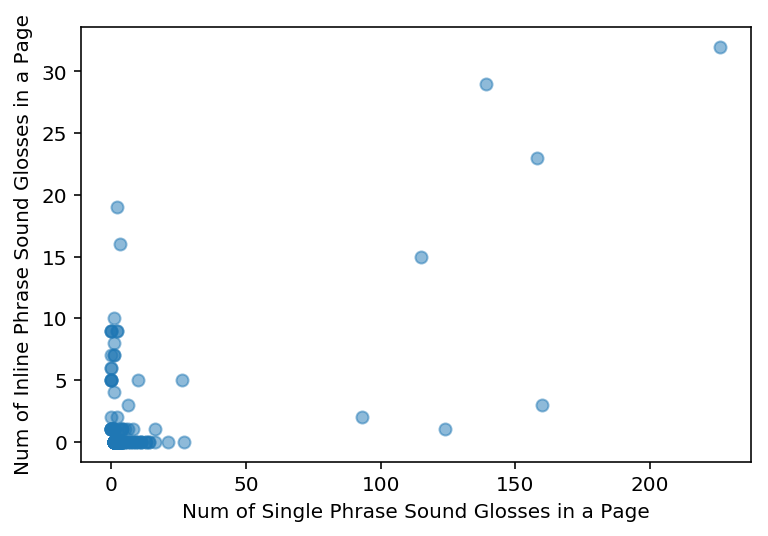

In [33]:
plt.scatter(
    [p[0] for p in single_inline_pairs if sum(p) > 0],
    [p[1] for p in single_inline_pairs if sum(p) > 0], alpha=0.5
 )
plt.xlabel("Num of Single Phrase Sound Glosses in a Page")
plt.ylabel("Num of Inline Phrase Sound Glosses in a Page")

Text(0.5,0,'(Single Phrase Sound Glosses)/(Num of Sound Glosses)')

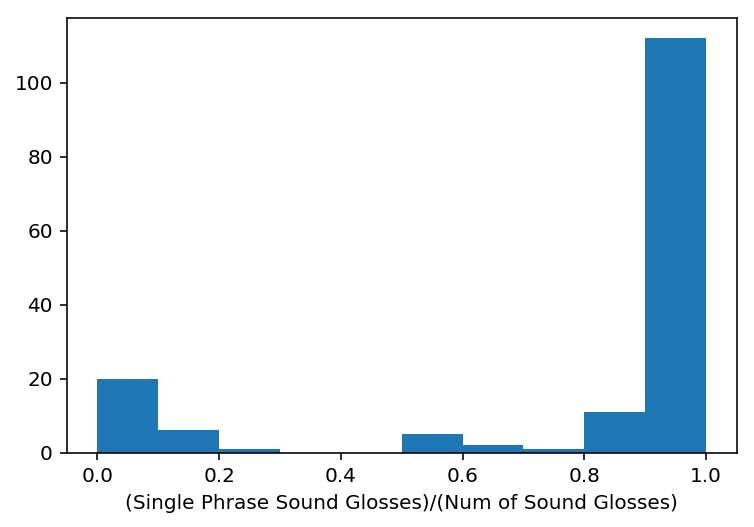

In [34]:
plt.hist([p[0] / sum(p) for p in single_inline_pairs if sum(p) > 0],)
plt.xlabel("(Single Phrase Sound Glosses)/(Num of Sound Glosses)")

It appears that single phrase sound glosses did not bound with inline sound glosses too often. Therefore, in the above histogram, low frequency and high frequency of `(Single Phrase Sound Glosses)/(Num of Sound Glosses)` are clustering as different groups.